In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file tidisater.csv
tidisater = pd.read_csv('tidisater.csv')
tidisater5 = tidisater.copy()

# Xử lý các biến từ phần 1
tidisater5.loc[tidisater5['Age'] <= 12, 'Agegroup'] = 'Kid'
tidisater5.loc[(tidisater5['Age'] > 12) & (tidisater5['Age'] <= 18), 'Agegroup'] = 'Teen'
tidisater5.loc[(tidisater5['Age'] > 18) & (tidisater5['Age'] <= 60), 'Agegroup'] = 'Adult'
tidisater5.loc[tidisater5['Age'] > 60, 'Agegroup'] = 'Older'
tidisater5['Agegroup'] = tidisater5['Agegroup'].fillna('Unknown')

tidisater5['familySize'] = 1 + tidisater5['SibSp'] + tidisater5['Parch']
tidisater5['Alone'] = np.where(tidisater5['familySize'] == 1, 1, 0)

# Thiết lập kiểu trực quan
sns.set(style="whitegrid")

# 12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.

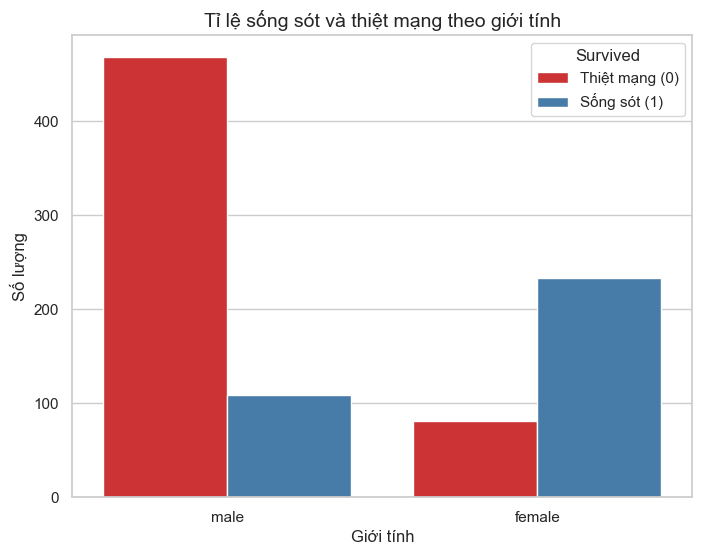

Nhận xét: Phụ nữ (female) có tỉ lệ sống sót cao hơn đáng kể so với nam giới (male). Hầu hết nam giới thiệt mạng, trong khi phần lớn phụ nữ sống sót, cho thấy giới tính là yếu tố quan trọng ảnh hưởng đến khả năng sống sót, có thể do chính sách ưu tiên cứu hộ.


In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(data=tidisater5, x='Sex', hue='Survived', palette='Set1')
plt.title('Tỉ lệ sống sót và thiệt mạng theo giới tính', fontsize=14)
plt.xlabel('Giới tính', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.legend(title='Survived', labels=['Thiệt mạng (0)', 'Sống sót (1)'])
plt.show()

print("Nhận xét: Phụ nữ (female) có tỉ lệ sống sót cao hơn đáng kể so với nam giới (male). "
      "Hầu hết nam giới thiệt mạng, trong khi phần lớn phụ nữ sống sót, cho thấy giới tính "
      "là yếu tố quan trọng ảnh hưởng đến khả năng sống sót, có thể do chính sách ưu tiên cứu hộ.")

# 13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).

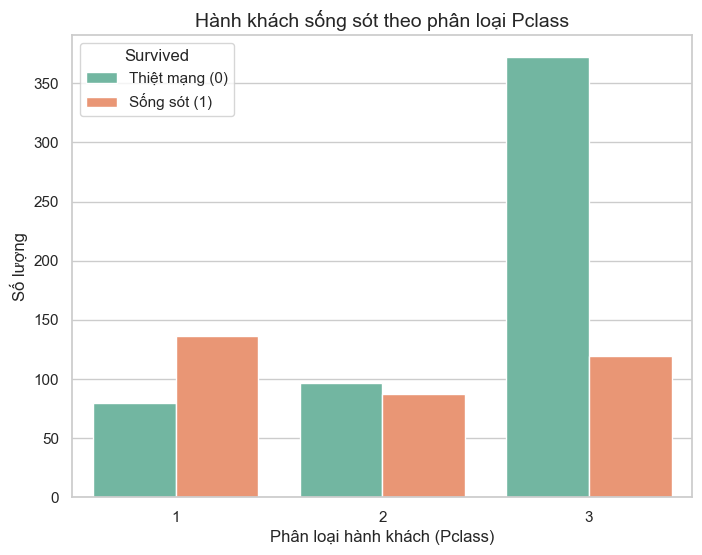

Nhận xét: Hành khách ở Pclass 1 có tỉ lệ sống sót cao nhất, trong khi Pclass 3 có số lượng thiệt mạng lớn nhất. Điều này cho thấy đẳng cấp kinh tế (Pclass) có ảnh hưởng mạnh đến khả năng sống sót, có thể do vị trí khoang hoặc ưu tiên cứu hộ.


In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=tidisater5, x='Pclass', hue='Survived', palette='Set2')
plt.title('Hành khách sống sót theo phân loại Pclass', fontsize=14)
plt.xlabel('Phân loại hành khách (Pclass)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.legend(title='Survived', labels=['Thiệt mạng (0)', 'Sống sót (1)'])
plt.show()

print("Nhận xét: Hành khách ở Pclass 1 có tỉ lệ sống sót cao nhất, trong khi Pclass 3 có số lượng "
      "thiệt mạng lớn nhất. Điều này cho thấy đẳng cấp kinh tế (Pclass) có ảnh hưởng mạnh đến "
      "khả năng sống sót, có thể do vị trí khoang hoặc ưu tiên cứu hộ.")

# 14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác

<Figure size 1200x600 with 0 Axes>

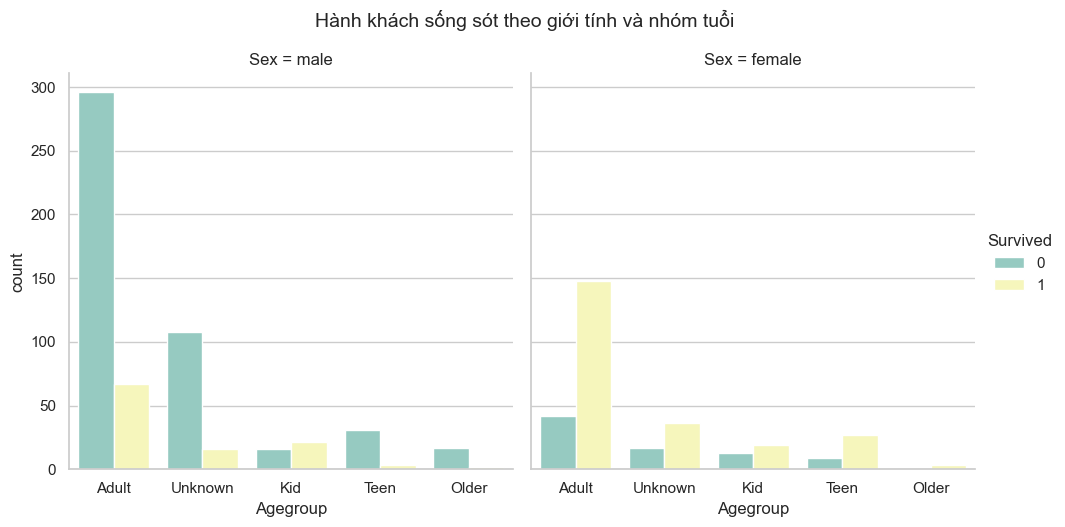

Nhận xét: Phụ nữ ở các nhóm tuổi Kid, Teen, và Adult có tỉ lệ sống sót cao hơn so với nam giới. Nam giới trưởng thành (Adult) có tỉ lệ thiệt mạng cao nhất, trong khi trẻ em nam (Kid) có cơ hội sống sót tốt hơn so với các nhóm tuổi khác trong cùng giới. Nhóm Unknown (tuổi không rõ) cũng cho thấy sự khác biệt lớn giữa hai giới.


In [6]:
plt.figure(figsize=(12, 6))
sns.catplot(data=tidisater5, x='Agegroup', hue='Survived', col='Sex', kind='count', 
            palette='Set3', height=5, aspect=1)
plt.suptitle('Hành khách sống sót theo giới tính và nhóm tuổi', fontsize=14, y=1.05)
plt.show()

print("Nhận xét: Phụ nữ ở các nhóm tuổi Kid, Teen, và Adult có tỉ lệ sống sót cao hơn so với nam giới. "
      "Nam giới trưởng thành (Adult) có tỉ lệ thiệt mạng cao nhất, trong khi trẻ em nam (Kid) có cơ hội "
      "sống sót tốt hơn so với các nhóm tuổi khác trong cùng giới. Nhóm Unknown (tuổi không rõ) cũng "
      "cho thấy sự khác biệt lớn giữa hai giới.")

# 15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng

C:\Users\84936\AppData\Local\Temp\ipykernel_14744\3057144348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tidisater5, x='Alone', y='Survived', palette='Set1', errorbar=None)


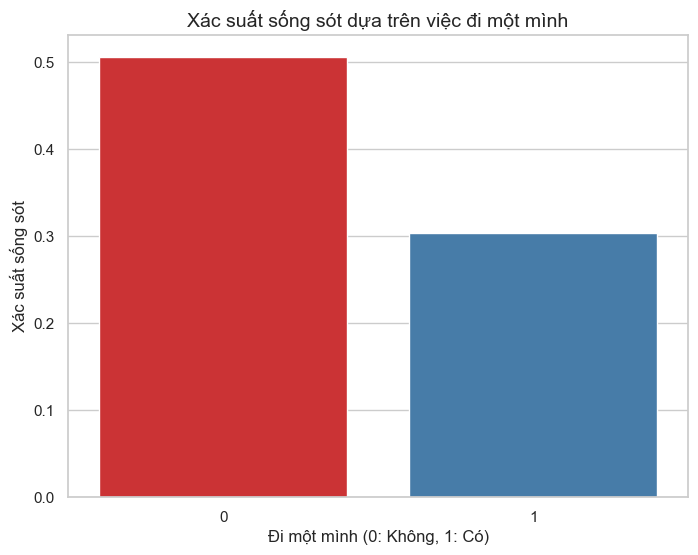

Nhận xét: Hành khách không đi một mình (Alone = 0) có xác suất sống sót cao hơn so với những người đi một mình (Alone = 1). Điều này có thể do sự hỗ trợ từ gia đình hoặc ưu tiên cứu hộ cho các nhóm có người thân.


In [7]:
plt.figure(figsize=(8, 6))
sns.barplot(data=tidisater5, x='Alone', y='Survived', palette='Set1', errorbar=None)
plt.title('Xác suất sống sót dựa trên việc đi một mình', fontsize=14)
plt.xlabel('Đi một mình (0: Không, 1: Có)', fontsize=12)
plt.ylabel('Xác suất sống sót', fontsize=12)
plt.show()

print("Nhận xét: Hành khách không đi một mình (Alone = 0) có xác suất sống sót cao hơn so với "
      "những người đi một mình (Alone = 1). Điều này có thể do sự hỗ trợ từ gia đình hoặc ưu tiên "
      "cứu hộ cho các nhóm có người thân.")

# 16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé

C:\Users\84936\AppData\Local\Temp\ipykernel_14744\573625074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tidisater5, x='FareGroup', y='Survived', palette='Set2', errorbar=None)


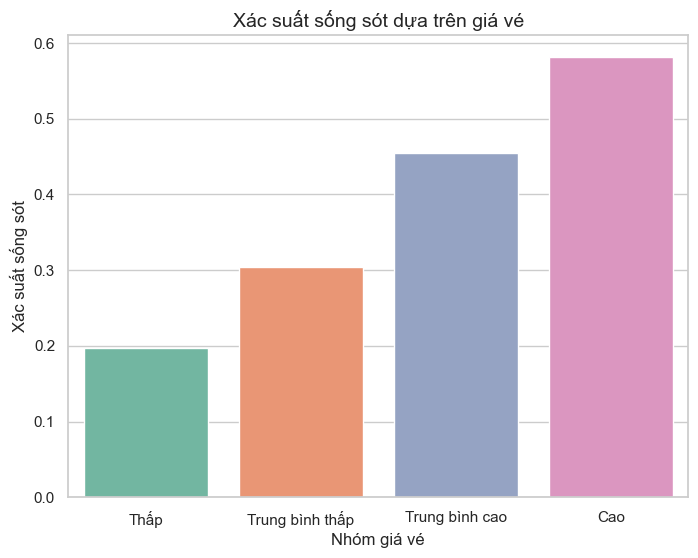

Nhận xét: Hành khách trả giá vé cao (FareGroup = Cao) có xác suất sống sót cao nhất, trong khi nhóm giá vé thấp có xác suất thấp nhất. Giá vé phản ánh đẳng cấp kinh tế, ảnh hưởng trực tiếp đến cơ hội sống sót.


In [8]:
tidisater5['FareGroup'] = pd.qcut(tidisater5['Fare'], 4, labels=['Thấp', 'Trung bình thấp', 
                                                                 'Trung bình cao', 'Cao'])

plt.figure(figsize=(8, 6))
sns.barplot(data=tidisater5, x='FareGroup', y='Survived', palette='Set2', errorbar=None)
plt.title('Xác suất sống sót dựa trên giá vé', fontsize=14)
plt.xlabel('Nhóm giá vé', fontsize=12)
plt.ylabel('Xác suất sống sót', fontsize=12)
plt.show()

print("Nhận xét: Hành khách trả giá vé cao (FareGroup = Cao) có xác suất sống sót cao nhất, "
      "trong khi nhóm giá vé thấp có xác suất thấp nhất. Giá vé phản ánh đẳng cấp kinh tế, "
      "ảnh hưởng trực tiếp đến cơ hội sống sót.")

# 17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến.

<Figure size 1200x600 with 0 Axes>

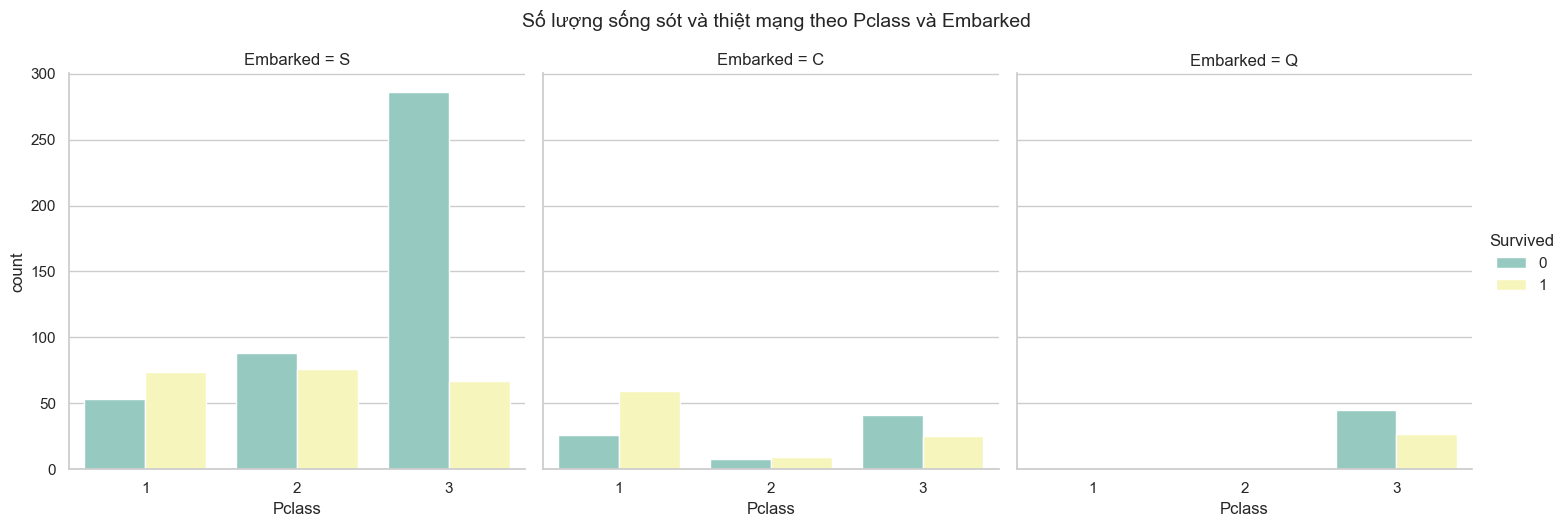

Nhận xét: Hành khách Pclass 1 từ cảng S và C có tỉ lệ sống sót cao hơn so với Q. Pclass 3 từ cảng S có số lượng thiệt mạng lớn nhất, do đây là nhóm đông nhất và ít được ưu tiên. Pclass 2 từ cảng Q có rất ít hành khách sống sót, cho thấy cảng lên tàu cũng ảnh hưởng đến kết quả.


In [9]:
plt.figure(figsize=(12, 6))
sns.catplot(data=tidisater5, x='Pclass', hue='Survived', col='Embarked', kind='count', 
            palette='Set3', height=5, aspect=1)
plt.suptitle('Số lượng sống sót và thiệt mạng theo Pclass và Embarked', fontsize=14, y=1.05)
plt.show()

print("Nhận xét: Hành khách Pclass 1 từ cảng S và C có tỉ lệ sống sót cao hơn so với Q. "
      "Pclass 3 từ cảng S có số lượng thiệt mạng lớn nhất, do đây là nhóm đông nhất và ít được ưu tiên. "
      "Pclass 2 từ cảng Q có rất ít hành khách sống sót, cho thấy cảng lên tàu cũng ảnh hưởng đến kết quả.")